<a href="https://colab.research.google.com/github/ARMH2612/10-Projects/blob/main/CAM_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision 
import matplotlib.pyplot as plt
import numpy as np
import cv2
import torch.nn as nn
from torchvision import datasets, models, transforms
from torch.nn import functional as F
import torch.optim as optim

In [ ]:
train = datasets.MNIST('', train=True, download=True, transform = transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST('', train=False, download=True, transform = transforms.Compose([transforms.ToTensor()]))

trainset_loader = torch.utils.data.DataLoader(train, batch_size=128, shuffle=True)
testset_loader = torch.utils.data.DataLoader(test, batch_size=128, shuffle=True)

print(len(train))
# print(train.shape)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw

60000


# Simple Convolutional Neural Network to classify MNIST digits

In [ ]:
class CNN_MNIST(nn.Module):
  def __init__(self):
    super().__init__()
    # 28 - 3 + 2 + 1 = 28
    self.conv1 = nn.Conv2d(in_channels=1, out_channels = 8, kernel_size = 3, padding = 1)
    # 28 - 2 + 1 = 27
    self.pooling1 = nn.MaxPool2d(kernel_size = 2)
    # 27 - 3 + 2 + 1 = 27
    self.conv2 = nn.Conv2d(in_channels = 8, out_channels = 16, kernel_size = 3, padding = 1)
    # 
    self.pooling2 = nn.MaxPool2d(kernel_size = 2)
    # it was supposed to be 16 * 26 * 26, idk why didnt work
    self.fc = nn.Linear(16*7*7, 10)

  def forward(self, x):
    x = nn.functional.relu(self.conv1(x))
    x = self.pooling1(x)
    x = nn.functional.relu(self.conv2(x))
    x = self.pooling2(x)
    x = x.view((-1, 16*7*7))

    return nn.functional.softmax(self.fc(x))

  

In [ ]:
model = CNN_MNIST().cuda()
# model = CNN_MNIST()
print(model)

CNN_MNIST(
  (conv1): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pooling1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pooling2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=784, out_features=10, bias=True)
)


### training the CNN

Epoch 1/20: 

<ipython-input-3-6799241b9fdc>:22: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(self.fc(x))


Training loss = 1.7817662339220677
Epoch 2/20: Training loss = 1.632753416673461
Epoch 3/20: Training loss = 1.5869768420770478
Epoch 4/20: Training loss = 1.5785331207551936
Epoch 5/20: Training loss = 1.5742326095414314
Epoch 6/20: Training loss = 1.5714460321580932
Epoch 7/20: Training loss = 1.5691661117935993
Epoch 8/20: Training loss = 1.5481226878888064
Epoch 9/20: Training loss = 1.4829631347391905
Epoch 10/20: Training loss = 1.48064319462156
Epoch 11/20: Training loss = 1.4790526262478534
Epoch 12/20: Training loss = 1.4778120304221538
Epoch 13/20: Training loss = 1.4770333853357636
Epoch 14/20: Training loss = 1.4762053769280408
Epoch 15/20: Training loss = 1.4752757711959545
Epoch 16/20: Training loss = 1.47494169542276
Epoch 17/20: Training loss = 1.4742279561089555
Epoch 18/20: Training loss = 1.4733344522366392
Epoch 20/20: Training loss = 1.472326529305627


Text(0, 0.5, 'Training loss')

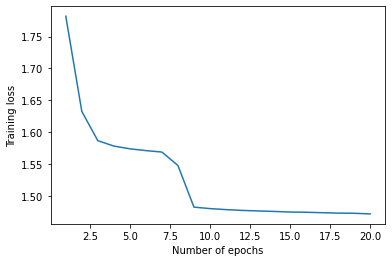

In [ ]:
num_epochs = 20
learning_rate = 0.001
optimizer = optim.Adam(model.parameters(), lr = learning_rate)
loss_fn = nn.CrossEntropyLoss()

train_loss_list = []
for epoch in range(num_epochs):
  print(f"Epoch {epoch+1}/{num_epochs}:", end = " ")
  train_loss = 0

  for data in trainset_loader:
    X, y = data
    model.zero_grad()
    X = X.cuda()
    y = y.cuda()

    output = model(X)
    loss = loss_fn(output, y)

    loss.backward()
    optimizer.step()
    train_loss += loss.item()

  train_loss_list.append(train_loss/ len(trainset_loader))
  print(f"Training loss = {train_loss_list[-1]}")

plt.plot(range(1, num_epochs+1), train_loss_list)
plt.xlabel("Number of epochs")
plt.ylabel("Training loss")


### Testing the CNN

In [ ]:
test_acc=0
model.eval()
  
with torch.no_grad():
  test_acc= 0
  #Iterating over the training dataset in batches
  for i, (images, labels) in enumerate(testset_loader):
      
      images = images.cuda()
      y_true = labels.cuda()

      #Calculating outputs for the batch being iterated
      outputs = model(images)
        
      #Calculated prediction labels from models
      _, y_pred = torch.max(outputs.data, 1)
        
      #Comparing predicted and true labels
      test_acc += (y_pred == y_true).sum().item()
      
  print(f"Test set accuracy = {100 * test_acc / len(test)} %")

<ipython-input-3-6799241b9fdc>:22: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(self.fc(x))


Test set accuracy = 98.57 %


### check if the training set instances are distributed equally in each class (not necessary here, just for did it for data prep haha)

Text(0, 0.5, 'Number of training instances')

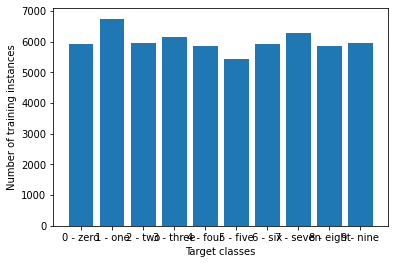

In [ ]:
classes = []
for batch_idx, data in enumerate(trainset_loader):
  X, y = data
  X = X.cuda()
  y = y.cuda()
  classes.extend(y.tolist())
unique, counts = np.unique(classes, return_counts= True)
names = list(test.class_to_idx.keys())
plt.bar(names, counts)
plt.xlabel("Target classes")
plt.ylabel("Number of training instances")

### Showing some test samples

(-0.5, 116.5, 29.5, -0.5)

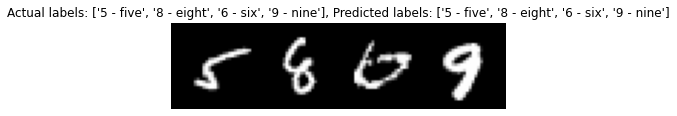

In [ ]:
num_images = 4
y_true_name = [names[y_true[idx]] for idx in range(num_images)]
y_pred_name = [names[y_pred[idx]] for idx in range(num_images)]

title = f"Actual labels: {y_true_name}, Predicted labels: {y_pred_name}"

plt.imshow(np.transpose(torchvision.utils.make_grid(images[:num_images].cpu(),normalize=True, padding=1).numpy(),(1,2,0)))
plt.title(title)
plt.axis('off')

# In this section I started the CAM

### got the labels and the training set images

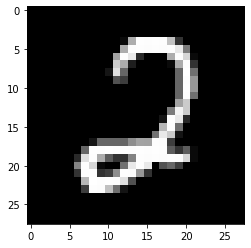

In [ ]:
dataiter = iter(testset_loader)
images_cams_try, labels = next(dataiter)

plt.imshow(np.transpose(torchvision.utils.make_grid(
    images_cams_try[0], normalize=True, padding=1, nrow=5
).numpy(), (1,2,0)))

In [ ]:
# hook to get the activation maps:
activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook

In [ ]:
# get the activation map of the first conv layer
model.conv1.register_forward_hook(get_activation('conv1'))
model.conv2.register_forward_hook(get_activation('conv2'))
output = model(images_cams_try[0].cuda())


<ipython-input-3-6799241b9fdc>:22: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(self.fc(x))


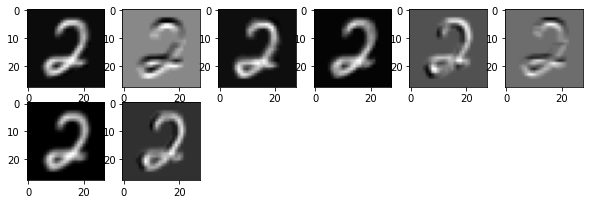

In [ ]:
# printing the activation maps:
plt.figure(figsize=(10,10)) 
for i in range(8):
    plt.subplot(6,6,i+1)    
    plt.imshow(activation['conv1'][i].cpu(), cmap='gray')
    # plt.tight_layout()
plt.show()

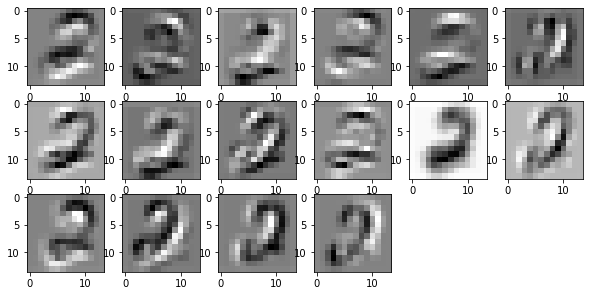

In [ ]:
# print(activation['conv2'].shape)
plt.figure(figsize=(10,10)) 
for i in range(16):
    plt.subplot(6,6,i+1)    
    plt.imshow(activation['conv2'][i].cpu(), cmap='gray')
    # plt.tight_layout()
plt.show()

In [ ]:
# function to show the kernels of each layer:
import math
def print_kernels(layer):
    kernels = layer.weight.detach().cpu().numpy()
    size = math.floor(math.sqrt(len(kernels)))+1
    # print(kernels.shape)
    for i in range(kernels.shape[0]):
        plt.subplot(size, size, i+1)
        # i took the first from each kernel set
        plt.imshow(kernels[i][0], cmap='gray')
        # print(len(kernels[i]))

    plt.show()

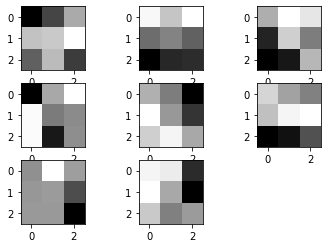

In [ ]:
print_kernels(model.conv1)

In [ ]:
class CNN_MNIST_GAP(nn.Module):
  def __init__(self):
    super().__init__()
    # 28 - 3 + 2 + 1 = 28
    self.conv1 = nn.Conv2d(in_channels=1, out_channels = 8, kernel_size = 3, padding = 1)
    # 28 - 2 + 1 = 27
    self.pooling1 = nn.MaxPool2d(kernel_size = 2)
    # 27 - 3 + 2 + 1 = 27
    self.conv2 = nn.Conv2d(in_channels = 8, out_channels = 16, kernel_size = 3, padding = 1)
    # 
    self.gap = nn.AdaptiveAvgPool2d((1,1)) # to get 1 output and simulate the gap
    # it was supposed to be 16 * 26 * 26, idk why didnt work
    self.fc = nn.Linear(16, 10)

  def forward(self, x):
    x = nn.functional.relu(self.conv1(x))
    x = self.pooling1(x)
    x = nn.functional.relu(self.conv2(x))
    x = self.gap(x)
    x = x.view((-1, 16))

    return nn.functional.softmax(self.fc(x))


In [ ]:
model_gap = CNN_MNIST_GAP().cuda()
# model_gap = CNN_MNIST_GAP()
print(model_gap)


CNN_MNIST_GAP(
  (conv1): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pooling1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (gap): AdaptiveAvgPool2d(output_size=(1, 1))
  (fc): Linear(in_features=16, out_features=10, bias=True)
)


Epoch 1/20: 

<ipython-input-25-8f4b91fb9113>:22: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(self.fc(x))


Training loss = 2.2074482344361
Epoch 2/20: Training loss = 2.186337621481434
Epoch 3/20: Training loss = 2.1799255454464
Epoch 4/20: Training loss = 2.1758656593273953
Epoch 5/20: Training loss = 2.17201969211798
Epoch 6/20: Training loss = 2.16821829088207
Epoch 7/20: Training loss = 2.163266332418934
Epoch 8/20: Training loss = 2.1589762340984873
Epoch 9/20: Training loss = 2.1540072472619096
Epoch 10/20: Training loss = 2.1487680610054847
Epoch 11/20: Training loss = 2.1448513404138563
Epoch 12/20: Training loss = 2.14067893292604
Epoch 13/20: Training loss = 2.137447511717709
Epoch 14/20: Training loss = 2.1342999299706173
Epoch 15/20: Training loss = 2.1309044457701987
Epoch 16/20: Training loss = 2.1279387631650164
Epoch 17/20: Training loss = 2.1247292546066903
Epoch 18/20: Training loss = 2.1204333661207513
Epoch 19/20: Training loss = 2.11625123532342
Epoch 20/20: Training loss = 2.1119252257763956


Text(0, 0.5, 'Training loss')

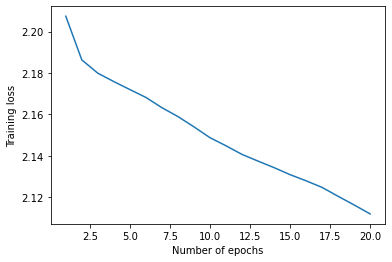

In [ ]:
num_epochs = 20
learning_rate = 0.001
optimizer = optim.Adam(model_gap.parameters(), lr = learning_rate)
loss_fn = nn.CrossEntropyLoss()

train_loss_list = []
for epoch in range(num_epochs):
  print(f"Epoch {epoch+1}/{num_epochs}:", end = " ")
  train_loss = 0

  for data in trainset_loader:
    X, y = data
    model_gap.zero_grad()
    X = X.cuda()
    y = y.cuda()

    output = model_gap(X)
    loss = loss_fn(output, y)

    loss.backward()
    optimizer.step()
    train_loss += loss.item()

  train_loss_list.append(train_loss/ len(trainset_loader))
  print(f"Training loss = {train_loss_list[-1]}")

plt.plot(range(1, num_epochs+1), train_loss_list)
plt.xlabel("Number of epochs")
plt.ylabel("Training loss")

In [ ]:
test_acc=0
model_gap.eval()
  
with torch.no_grad():
  test_acc= 0
  #Iterating over the training dataset in batches
  for i, (images, labels) in enumerate(testset_loader):
      
      images = images.cuda()
      y_true = labels.cuda()
      # y_true = labels

      #Calculating outputs for the batch being iterated
      outputs = model_gap(images)
        
      #Calculated prediction labels from models
      _, y_pred = torch.max(outputs.data, 1)
        
      #Comparing predicted and true labels
      test_acc += (y_pred == y_true).sum().item()
      
  print(f"Test set accuracy = {100 * test_acc / len(test)} %")

<ipython-input-25-8f4b91fb9113>:22: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(self.fc(x))


Test set accuracy = 20.17 %


Image shape: torch.Size([1, 28, 28])
Features shape: torch.Size([16, 14, 14])
GAP outputs: tensor([[[ -2.1400,  16.8374,  -7.7771,  13.1689,   8.7161, -12.3936,  13.5746,
           12.1584,  10.3472,   0.0296,  14.0972,  11.8386, -11.5006,  -9.4690,
           18.4883,  27.9145]]], device='cuda:0')
Fc output: tensor([[3.0137e-26, 0.0000e+00, 2.2668e-33, 3.2961e-20, 0.0000e+00, 8.4611e-25,
         1.2001e-31, 2.1160e-43, 1.0000e+00, 1.3347e-19]], device='cuda:0')
predicted :  8 - eight
weights shape: torch.Size([10, 16])
Number of classes: 10 , Number of activation maps: 16
Features shape after reshape: torch.Size([16, 196])
cam shape: (10, 196)
cam_reshaped shape: (10, 14, 14)
cam upsampled shape: (10, 28, 28)


<ipython-input-37-1f4681ab82f2>:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  fc_output = nn.functional.softmax(model_gap.fc(gap_output.view(-1,16)))


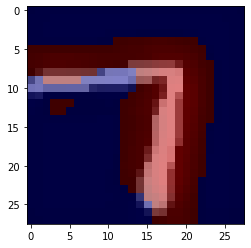

In [ ]:
img = images_cams_try[4].cuda()
# img = images_cams_try[6]
print("Image shape:", img.shape)

model_gap.eval()
with torch.no_grad():
  features = model_gap.conv2(model_gap.pooling1(model_gap.conv1(img)))
  print("Features shape:",features.shape)
  gap_output = model_gap.gap(features)
  print("GAP outputs:",gap_output.T)

  fc_output = nn.functional.softmax(model_gap.fc(gap_output.view(-1,16)))
  print("Fc output:", fc_output)
  _, pred = torch.max(fc_output, 1)
  print("predicted : ", testset_loader.dataset.classes[pred])


  weights = model_gap.fc.weight.detach()
  # weights = list(model_gap.fc.weight.detach())
  print("weights shape:",weights.shape)

  num_classes = weights.size(0)
  num_am = weights.size(1)
  print("Number of classes:", num_classes, ", Number of activation maps:",num_am)

  # reshape to be able to performe the dot product:
  features_reshaped = features.reshape((num_am, 14*14))
  print("Features shape after reshape:", features_reshaped.shape)
  
  cam = np.dot(weights.cpu(),features_reshaped.cpu())
  print("cam shape:", cam.shape)
  # reshape it back to images(matrices) instead of an array
  cam_reshaped = cam.reshape(-1, 14,14)
  # cam_reshaped = np.max(cam_reshaped, axis=0)
  print("cam_reshaped shape:", cam_reshaped.shape)

  # normalize
  cam_norm = cam_reshaped / np.linalg.norm(cam_reshaped)
  # cam_norm = cam_norm[0]
  # upsample it:
  # cam_upsample = cv2.resize(cam_norm,(28,28))
  cam_upsample = []
  for cam_n in cam_norm:
    cam_upsample.append(cv2.resize(cam_n, (28,28)))
  cam_upsample = np.array(cam_upsample)
  print("cam upsampled shape:", cam_upsample.shape)

  heatmap = cv2.applyColorMap(np.uint8(255*cam_upsample[0]), cv2.COLORMAP_JET)

  plt.imshow(np.transpose(torchvision.utils.make_grid(
          img.cpu(), normalize=True, padding=1, nrow=5
      ).numpy(), (1,2,0)))
  plt.imshow(heatmap, alpha=0.5)
